Autor: Gustavo Henrique Reis de Araújo Lima

Última atualização: 17/04/2020

(Feito em Julia 1.4)

# 1. Cinemática

## 1.5 Movimento Retilíneo Uniforme (MRU)

### 1.5.2 Velocidade em função do tempo

Um objeto se movimento em relação a um certo referencial com velocidade constante. A posição deste objeto em relação ao referencial em função do tempo, $s(t)$, está representada no gráfico abaixo:

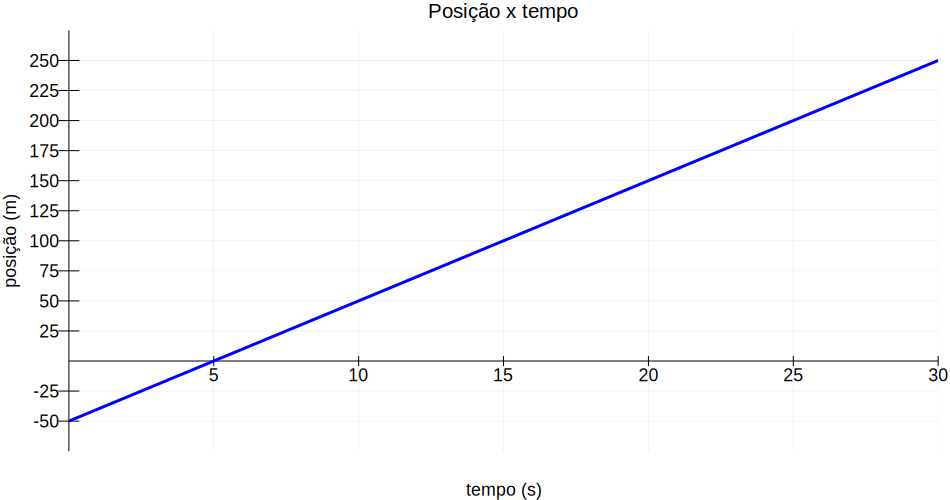

In [1]:
#carregando bibliotecas necessárias
using Plots
using Printf
using LaTeXStrings

npoints = 301 #definindo números de pontos 
tempo = range(0,30, length = npoints) #definindo o intervalo de tempo
s1 = range(-50,250, length = npoints) #definindo as posições do objeto

#desenhando o gráfico da posição x tempo
plot(tempo, s1, color = :blue, lw = 3, xaxis = ("tempo (s)", (0,30), 0:5:30, font(12)),
    yaxis = ("posição (m)", (-75,275), -50:25:250, font(12)), legend = :none, size = (950,500),
    framestyle = :origin, title = "Posição x tempo")

Analisando o gráfico acima conseguimos descobrir a posição inicial do objeto, calcular a velocidade através da inclinação do gráfico, e, finalmente, montar a equação da posição em função do tempo: $s(t) = v\cdot t + s_0$.

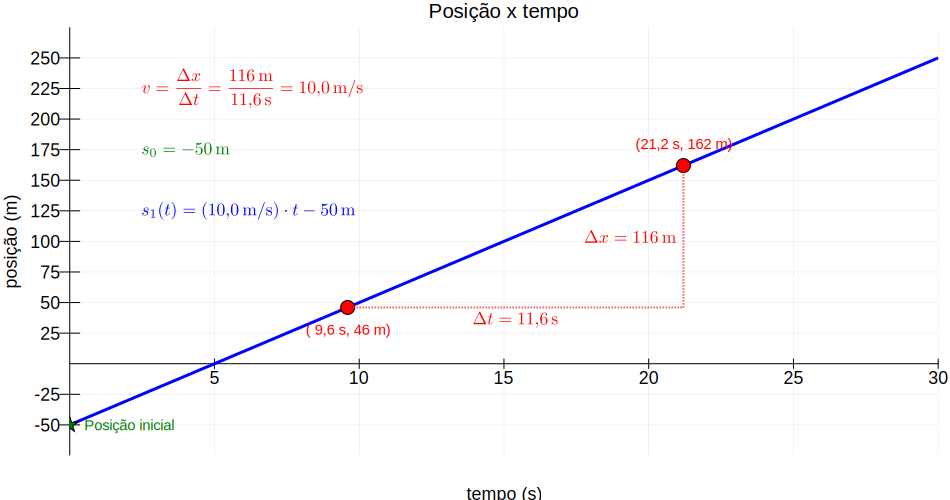

In [2]:
#escolhendo os pontos utilizados para calcular a inclinação da reta (1 <= p <= 301)
p1 = 97
p2 = 213

#criando anotações com as coordenadas cartesianas dos dois pontos escolhidos p1 e p2
p1str = @sprintf("(%4.1f s, %3.0f m)", tempo[p1], s1[p1])
p1str = replace(p1str, "." => ",")
p2str = @sprintf("(%4.1f s, %3.0f m)", tempo[p2], s1[p2])
p2str = replace(p2str, "." => ",")
annpts = [(tempo[p1], s1[p1] - 18, text(p1str, pointsize = 10, halign = :center, color = :red)),
   (tempo[p2], s1[p2] + 18, text(p2str, pointsize = 10, halign = :center, color = :red)),
   ((tempo[1] + 0.5), s1[1], text("Posição inicial", pointsize = 10, halign = :left, color = :green))]

#criando string e definindo a posição da anotação para mostrar o deslocamento do objeto entre p1 e p2
dxstrv = @sprintf("%3.0f", s1[p2]-s1[p1])
dxstr = latexstring("\\Delta x = ", dxstrv, "\\, \\mathrm{m}")
dxstr = replace(dxstr, "." => ",\\!")
pxdx = tempo[p2] - 0.25
pydx = (s1[p2]+s1[p1])/2

#criando string e definindo a posição da anotação para mostrar o intervalo de tempo entre p1 e p2
dtstrv = @sprintf("%4.1f", tempo[p2]-tempo[p1])
dtstr = latexstring("\\Delta t = ", dtstrv, "\\, \\mathrm{s}")
dtstr = replace(dtstr, "." => ",\\!")
pxdt = (tempo[p2] + tempo[p1])/2
pydt = s1[p1] - 10

anndel = [(pxdx,pydx, text(dxstr, pointsize = 12, halign = :right, color = :red)),
  (pxdt,pydt, text(dtstr, pointsize = 12, halign = :center, color = :red))]

#cálculo da velocidade utilizando p1 e p2
v1 = (s1[p2]-s1[p1])/(tempo[p2]-tempo[p1])

#criando string mostrando o cálculo da velocidade
v1strv = @sprintf("%3.1f", v1)
velstr = latexstring("v = \\frac{\\Delta x}{\\Delta t} = \\frac{", dxstrv, "\\, \\mathrm{m}}{",
   dtstrv, "\\, \\mathrm{s}} = ", v1strv, "\\, \\mathrm{m/s}")
velstr = replace(velstr, "." => ",\\!")

#criando string mostrando a posição inicial do objeto
s0strv = @sprintf("%3.0f", s1[1])
s0str = latexstring("s_0 = ", s0strv, "\\, \\mathrm{m}")

# criando string com a equação do movimento do objeto
eqstr = latexstring("s_1(t) = (", v1strv, "\\, \\mathrm{m/s}) \\cdot t +", s0strv, "\\, \\mathrm{m}")
s1[1] < 0 && (eqstr = latexstring("s_1(t) = (", v1strv, "\\, \\mathrm{m/s}) \\cdot t ", s0strv, "\\, \\mathrm{m}"))
eqstr = replace(eqstr, "." => ",\\!")

#anotação com o cálculo da velocidade, posição inicial e equação de s(t)
annvel = [(2.5,225, text(velstr, pointsize = 12, halign = :left, color = :red)),
    (2.5, 175, text(s0str, pointsize = 12, halign = :left, color = :green)),
    (2.5, 125, text(eqstr, pointsize = 12, halign = :left, color = :blue))]


#desenhando o gŕafico
plot(tempo, s1, color = :blue, lw = 3, xaxis = ("tempo (s)", (0,30), 0:5:30, font(12)),
    yaxis = ("posição (m)", (-75,275), -50:25:250, font(12)), legend = :none, size = (950,500),
    framestyle = :origin, title = "Posição x tempo")
scatter!([tempo[1]],[s1[1]], marker = :star, color = :green, markersize = 8)
scatter!([tempo[p1]],[s1[p1]], marker = :circle, color = :red, markersize = 8, ann = annpts)
scatter!([tempo[p2]],[s1[p2]], marker = :circle, color = :red, markersize = 8)

plot!([tempo[p1],tempo[p2]],[s1[p1],s1[p1]], ls = :dot, lw = 2, color = :red)
plot!([tempo[p2],tempo[p2]],[s1[p1],s1[p2]], ls = :dot, lw = 2, color = :red, ann = anndel)

annotate!(ann = annvel)



Como vimos anteriormente, a inclinação da reta que descreve o movimento de um objeto em função do tempo representa a velocidade do objeto. A inclinação de uma reta é uma constante que define a reta, assim como a velocidade é uma constante no MRU. Como a velocidade do objeto é constante, o gráfico da velocidade em função do tempo é o gráfico de uma função constante.

Abaixo podemos ver novamente o gráfico que descreve a posição do objeto em função do tempo, e o gráfico que descreve a velocidade do objeto ao longo do tempo.

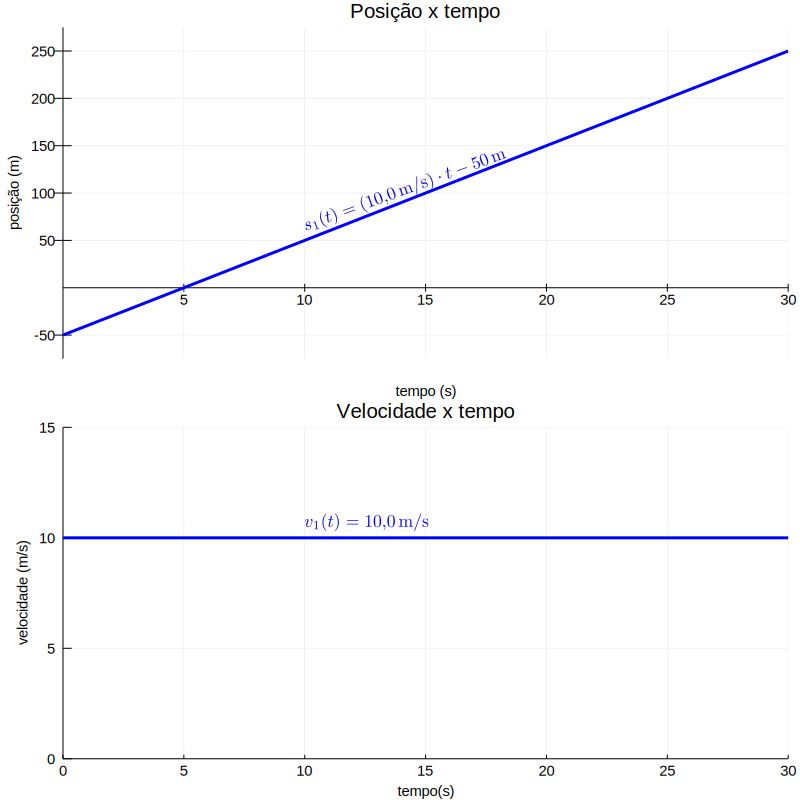

In [3]:
#Definindo anotação com a função de s(t)
anneq = [(10,65, text(eqstr, pointsize = 12, halign = :left, rotation = 20, color = :blue))]

#Definindo anotação com a função de v(t)
veqstr = latexstring("v_1(t) = ", v1strv, "\\,\\mathrm{m/s}")
veqstr = replace(veqstr, "." => ",\\!")
annveq = [(10,10.7, text(veqstr, pointsize = 12, halign = :left, color = :blue))]

#definindo as características de cada um dos gráficos
plt1 = plot(tempo, s1, color = :blue, lw = 3, xaxis = ("tempo (s)", (0,30), 0:5:30, font(10)),
    yaxis = ("posição (m)", (-75,275), -50:50:250, font(10)), legend = :none, size = (950,500),
    framestyle = :origin, title = "Posição x tempo", ann = anneq)
plt2 = plot([tempo[1],tempo[npoints]],[v1,v1], title = "Velocidade x tempo", lw = 3,
    xaxis = ("tempo(s)", (0,30), 0:5:30, font(10)), yaxis = ("velocidade (m/s)", (0,15), 0:5:15, font(10)),
    size = (950,500), legend = :none, color = :blue, ann = annveq)

#desenhando um gráfico abaixo do outro
plot(plt1, plt2, layout=(2,1), size = (800,800))

Lembrando que o gráfico que representa uma função constante é uma reta paralela ao eixo das abscissas - nesse caso, o eixo do tempo. A equação que descreve a velocidade em função do tempo no MRU será sempre uma equação do tipo:

$$ v(t) = v_0,$$

onde $v_0$ é a velocidade constante do objeto.

Também é possível tirar algumas informações sobre o movimento, a partir do gráfico da velocidade em função do tempo. A área da figura formada pela reta da velocidade, entre dois instantes de tempo $t_1$ e $t_2$, por exemplo, representa o deslocamento do objeto no intervalo entre esses dois instantes de tempo.

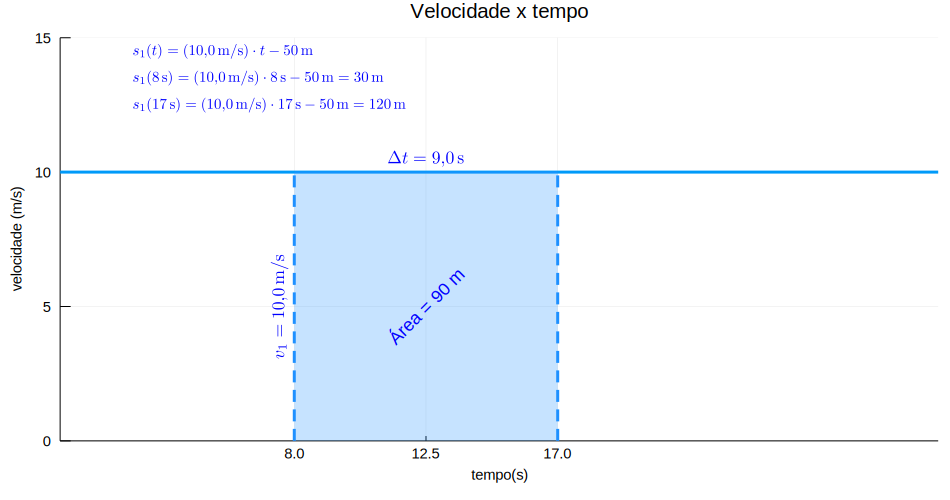

In [4]:
#definindo os limites t1 e t2 para calcular o deslocamento do objeto
#esses valores podem ser trocados por quaisquer valores, de preferência entre 0 e 30s para que não seja necessário
#mudar os eixos dos gráficos
t1 = 8 #segundos
t2 = 17 #segundos
Δt = t2 - t1
Δtstep = Δt/2 #valor utilizado ao calcular os valores de tempo mostrados no eixo do tempo

#criando função que calcula s(t): t(instante de tempo), v(velocidade), s0(posição inicial)
function s(t,v,s0)
    return v*t + s0
end

#calculando a posição do objeto no instante t1
ss1 = s(t1,v1,s1[1])

#criando string mostrando s(t1) = v*t1 + s0 = posição1
ss1strv = @sprintf("%3.0f", ss1)
s1str = latexstring("s_1 (", t1, "\\,\\mathrm{s}) = (", v1strv, "\\,\\mathrm{m/s}) \\cdot ", t1, 
    "\\,\\mathrm{s} ", s0strv, "\\,\\mathrm{m} = ", ss1strv, "\\,\\mathrm{m}")
s1str = replace(s1str, "." => ",\\!")

#calculando a posição do objeto no instante t2
ss2 = s(t2,v1,s1[1])

#criando string mostrando s(t2) = v*t2 + s0 = posição2
ss2strv = @sprintf("%3.0f", ss2)
s2str = latexstring("s_1 (", t2, "\\,\\mathrm{s}) = (", v1strv, "\\,\\mathrm{m/s}) \\cdot ", t2, 
    "\\,\\mathrm{s} ", s0strv, "\\,\\mathrm{m} = ", ss2strv, "\\,\\mathrm{m}")
s2str = replace(s2str, "." => ",\\!")

#calculando área do gráfico entre os intervalos t1 e t2
area = Δt*v1

#criando string para com o valor da área calculada
areastr = @sprintf("Área = %3.0f m", area)
areastr = replace(areastr, "." => ",")

#criando string para mostrar o valor do intervalo de tempo
Δtstrv = @sprintf("%3.1f", Δt)
Δtstr = latexstring("\\Delta t = ", Δtstrv, "\\,\\mathrm{s}")
Δtstr = replace(Δtstr, "." => ",\\!")

#criando string para mostrar o valor da velocidade
v1str = latexstring("v_1 = ", v1strv, "\\,\\mathrm{m/s}")
v1str = replace(v1str, "." => ",\\!")

#criando as anotações no gráfico: área; Δt; velocidade; s(t); s(t1); s(t2)
annarea = [((t1+t2)/2, v1/2, text(areastr, pointsize = 12, color = :blue, rotation = 45)),
    ((t1+t2)/2, v1+0.5, text(Δtstr, pointsize = 12, color = :blue)),
    (t1-0.5, v1/2, text(v1str, pointsize = 12, color = :blue, rotation = 90)),
    (2.5, 14.5, text(eqstr, pointsize = 10, color = :blue, halign = :left)),
    (2.5, 13.5, text(s1str, pointsize = 10, color = :blue, halign = :left)),
    (2.5, 12.5, text(s2str, pointsize = 10, color = :blue, halign = :left))]

#desenhando gráficos
plot([tempo[1],tempo[npoints]],[v1,v1], title = "Velocidade x tempo", lw = 3,
    xaxis = ("tempo(s)", (0,30), t1:Δtstep:t2, font(10)), yaxis = ("velocidade (m/s)", (0,15), 0:5:15, font(10)),
    size = (950,500), legend = :none)
plot!([t1,t2],[v1,v1], fill = (0, :dodgerblue), fillalpha = 0.25, color = :dodgerblue)
plot!([t1,t1],[0,v1], ls = :dash, lw = 3, color = :dodgerblue)
plot!([t2,t2],[0,v1], ls = :dash, lw = 3, color = :dodgerblue, ann = annarea)

A figura formada entre a reta que representa a velocidade e o eixo do tempo, e limitada entre dois intervalos de tempo $t_1$ e $t_2$, é um retângulo. A área desse retângulo será igual a base ($\Delta t$) multiplicada pela altura ($v$), mas como foi mostrado anteriormente:

$$v = \frac{\Delta s}{\Delta t} \; \therefore \; \Delta s = v \cdot \Delta t,$$

isso quer dizer que a área acima representa o deslocamento $\Delta s$ entre $t_1$ e $t_2$. 

Apesar de ser possível obter o deslocamento do objeto entre dois instantes de tempo quaisquer, não é possível descobrir a equação da posição em função do tempo apenas com essa informação. Para descobrir a equação da posição em função do tempo, 
é necessário além da informação obtida acima, saber antecipadamente a posição do objeto em qualquer instante de tempo
que seja.

Antes de mostrar um exemplo de como se descobre a equação de $s(t)$, vamos observar como é o que acontece com o gráfico de posição x tempo quando a velocidade é negativa!

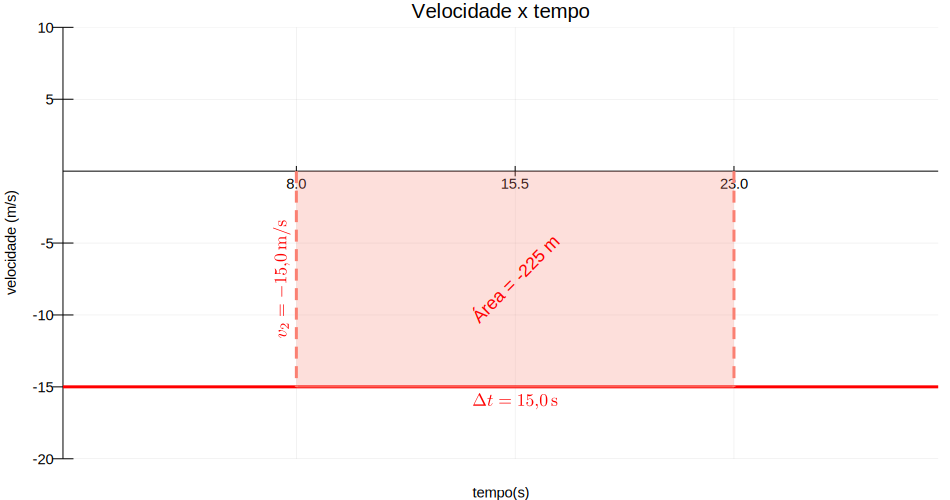

In [5]:
#definindo um novo valor de velocidade para um segundo objeto
v2 = -15 #m/s

#definindo intervalo de tempo para o cálculo do deslocamento
t3 = 8 #segundos
t4 = 23 #segundos
Δt2 = t4 - t3
Δtstep2 = (t4-t3)/2 

#calculando a área dentro do intervalo de tempo
area2 = Δt2*v2

#criando string com o valor da área
areastr2 = @sprintf("Área = %3.0f m", area2)
areastr2 = replace(areastr2, "." => ",")

#criando string com o valor de Δt
Δtstrv2 = @sprintf("%3.1f", Δt2)
Δtstr2 = latexstring("\\Delta t = ", Δtstrv2, "\\,\\mathrm{s}")
Δtstr2 = replace(Δtstr2, "." => ",\\!")

#criando string com o valor da v2
v2strv = @sprintf("%3.1f", v2)
v2str = latexstring("v_2 = ", v2strv, "\\,\\mathrm{m/s}")
v2str = replace(v2str, "." => ",\\!")

#definindo posição das anotações que serão mostradas no gráfico: área; Δt; velocidade
annarea2 = [((t3+t4)/2, v2/2, text(areastr2, pointsize = 12, color = :red, rotation = 45)),
    ((t3+t4)/2, v2-1, text(Δtstr2, pointsize = 12, color = :red)),
    (t3-0.5, v2/2, text(v2str, pointsize = 12, color = :red, rotation = 90))]

#desenhando gráficos
plot([tempo[1],tempo[npoints]],[v2,v2], title = "Velocidade x tempo", lw = 3,
    xaxis = ("tempo(s)", (0,30), t3:Δtstep2:t4, font(10)), yaxis = ("velocidade (m/s)", (-20,10), -20:5:10, font(10)),
    size = (950,500), legend = :none, framestyle = :origin, color = :red)
plot!([t3,t4],[v2,v2], fill = (0, :salmon), fillalpha = 0.25, color = :salmon)
plot!([t3,t3],[0,v2], ls = :dash, lw = 3, color = :salmon)
plot!([t4,t4],[0,v2], ls = :dash, lw = 3, color = :salmon, ann = annarea2)

Como a velocidade é negativa, a área também torna-se negativa, ou seja, o deslocamento do objeto é negativo - ele se move para uma posição cada vez menor em relação ao ponto de referência. (Lembrando que se mover para uma posição menor não quer dizer se aproximar do ponto de referência!)

Para calcular a equação de posição em função do tempo para o objeto do gráfico acima, deve-se saber de antemão a posição desse objeto em qualquer instante de tempo. Considere, então, que o objeto estava na posição $s_1 = 75\,\mathrm{m}$, no instante $t = 3,\!0\,\mathrm{s}$. Sabendo disso, é possível descobrir a posição inicial do objeto $s_0$, e assim sua equação da posição em função do tempo: 

$$ s_2(3,\!0\,\mathrm{s}) = (-15\,\mathrm{m/s}) \cdot 3,\!0\,\mathrm{s} + s_0 = 75\,\mathrm{m}$$

$$ s_0 = 75\,\mathrm{m} + (15\,\mathrm{m/s}) \cdot 3,\!0\,\mathrm{s}$$

$$ s_0 = 75\,\mathrm{m} + 45\,\mathrm{m} = 120\,\mathrm{m}.$$

Descobrindo a posição inicial $s_0$, conseguimos obter a equação de $s(t)$:

$$ s_2(t) = (-15\,\mathrm{m/s}) \cdot t + 120\,\mathrm{m}.$$

Agora, considere que há outro objeto com a mesma velocidade, mas que estava na posição $s_2 = 17\,\mathrm{m}$, no instante $t = 2,\!0\,\mathrm{s}$. A equação da posição desse objeto será:

$$ s_3(t) = (-15\,\mathrm{m/s}) \cdot t + 47\,\mathrm{m}.$$

Vamos ver como são as representações gráficas das duas equações acima.

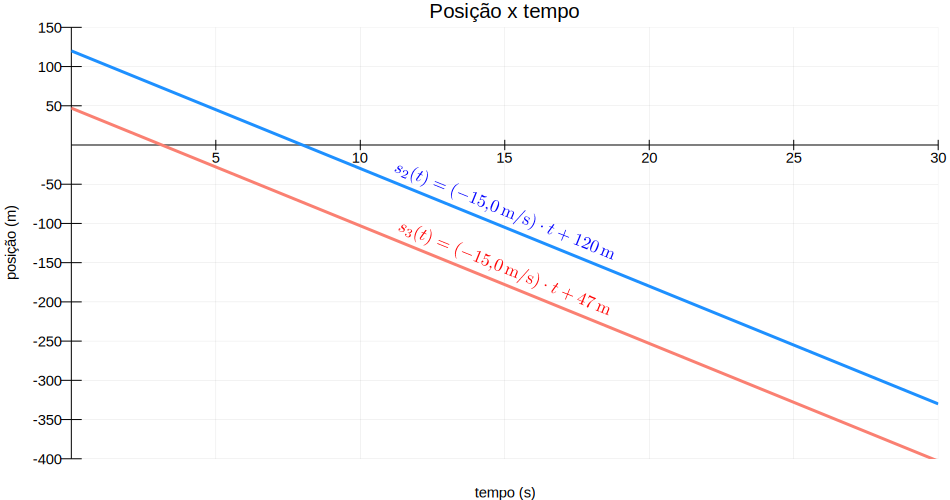

In [6]:
#definindo posição inicial do objeto 2
s02 = 120

#calculando as posições do objeto 2
s2 = map(t -> s(v2,t,s02), tempo)

#definindo posição inicial do objeto 3
s03 = 47

#calculando as posições do objeto 3
s3 = map(t -> s(v2,t,s03), tempo)

# criando string com a equação do movimento do objeto 2
eqstr2 = latexstring("s_2(t) = (", v2strv, "\\, \\mathrm{m/s}) \\cdot t +", s02, "\\, \\mathrm{m}")
s02 < 0 && (eqstr2 = latexstring("s_2(t) = (", v2strv, "\\, \\mathrm{m/s}) \\cdot t ", s02, "\\, \\mathrm{m}"))
eqstr2 = replace(eqstr2, "." => ",\\!")

# criando string com a equação do movimento do objeto 3
eqstr3 = latexstring("s_3(t) = (", v2strv, "\\, \\mathrm{m/s}) \\cdot t +", s03, "\\, \\mathrm{m}")
s03 < 0 && (eqstr3 = latexstring("s_3(t) = (", v2strv, "\\, \\mathrm{m/s}) \\cdot t ", s03, "\\, \\mathrm{m}"))
eqstr3 = replace(eqstr3, "." => ",\\!")

# definindo posição das anotações no gráfico: s_2(t); s_3(t)
anneqs2 = [(15, -85, text(eqstr2, pointsize = 12, color = :blue, rotation = -22)),
    (15, -158, text(eqstr3, pointsize = 12, color = :red, rotation = -22))]

#desenhando gráficos
plot(tempo,s2, title = "Posição x tempo", xaxis = ("tempo (s)", (0,30), 0:5:30, font(10)),
    yaxis = ("posição (m)", (-400, 150), -400:50:150, font(10)), framestyle = :origin, lw = 3,
    size = (950,500), legend = :none, color = :dodgerblue, ann = anneqs2)
plot!(tempo,s3, lw = 3, color = :salmon)

Como os dois objetos têm a mesma velocidade, as retas no gráfico de posição x tempo têm a mesma inclinação, ou seja, são retas paralelas. As retas $s_2$ e $s_3$ nunca se cruzam, e os objetos 2 e 3 estarão sempre separados pela mesma distância constante!

Vamos adicionar o gráfico de posição do objeto 1, ao gráfico acima.

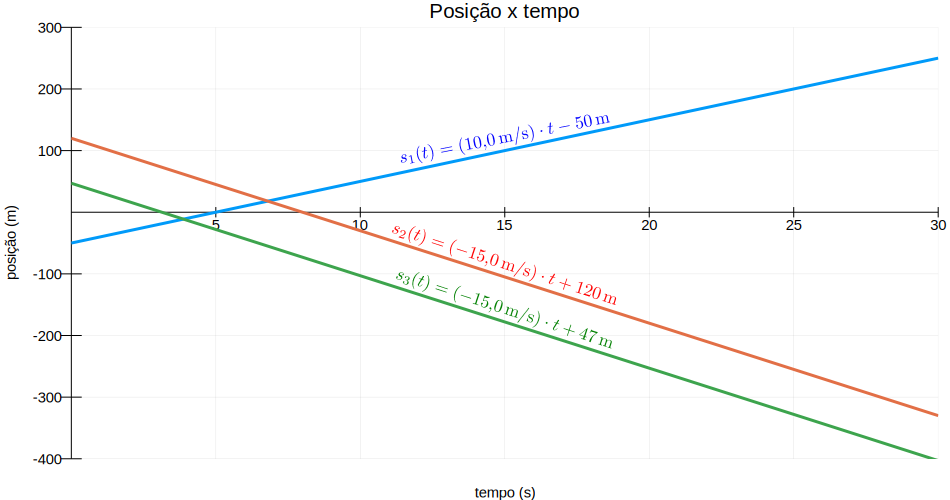

In [7]:
#Definindo anotação com a função de s(t)
anneq = [(15,120, text(eqstr, pointsize = 12, rotation = 11, color = :blue))]

# definindo posição das anotações no gráfico: s_2(t); s_3(t)
anneqs2 = [(15, -85, text(eqstr2, pointsize = 12, color = :red, rotation = -18)),
    (15, -158, text(eqstr3, pointsize = 12, color = :green, rotation = -18))]


plot(tempo, s1, lw = 3, xaxis = ("tempo (s)", (0,30), 0:5:30, font(10)),
    yaxis = ("posição (m)", (-400,300), -400:100:300, font(10)), legend = :none, size = (950,500),
    framestyle = :origin, title = "Posição x tempo", ann = anneq)
plot!(tempo,s2, title = "Posição x tempo", lw = 3, ann = anneqs2)
plot!(tempo,s3, lw = 3)

O ponto onde as retas se cruzam, representa a posição e o instante de tempo em que os objetos se cruzam. Para descobrir a posição e o instante em que os objetos se cruzam, deve-se igualar as equações de movimento dos objetos. Por exemplo, no instante em que os objetos 1 e 2 passam pela mesma posição simultaneamente: 

$$s_1(t) = s_2(t)$$

$$(10,\!0\, \mathrm{m/s})\cdot t - 50\,\mathrm{m} =  (-15,\!0\, \mathrm{m/s})\cdot t + 120\,\mathrm{m}$$

$$(10,\!0\, \mathrm{m/s})\cdot t + (15,\!0\, \mathrm{m/s})\cdot t = 120\,\mathrm{m} + 50\,\mathrm{m}$$

$$(25,\!0\, \mathrm{m/s})\cdot t = 170\,\mathrm{m}$$

$$t = \frac{170\,\mathrm{m}}{25,\!0\, \mathrm{m/s}}$$

$$t = 6,\!8\,\mathrm{s}.$$

Os objetos 1 e 2 se cruzam no instante $t = 6,\!8\,\mathrm{s}$. Substituindo esse valor na equação de posição do objeto 1, ou do objeto 2, é possível descobrir a posição onde eles se cruzam:

$$s_1(6,\!8\,\mathrm{s}) = (10,\!0\, \mathrm{m/s})\cdot 6,\!8\,\mathrm{s} - 50\,\mathrm{m}$$

$$s_1(6,\!8\,\mathrm{s}) = 68\,\mathrm{m} - 50\,\mathrm{m}$$

$$s_1(6,\!8\,\mathrm{s}) = 18\,\mathrm{m}.$$

Ou:

$$s_2(6,\!8\,\mathrm{s}) = (-15,\!0\, \mathrm{m/s})\cdot 6,\!8\,\mathrm{s} + 120\,\mathrm{m}$$

$$s_1(6,\!8\,\mathrm{s}) = -102\,\mathrm{m} + 120\,\mathrm{m}$$

$$s_1(6,\!8\,\mathrm{s}) = 18\,\mathrm{m}.$$

Então:

$$s_1(6,\!8\,\mathrm{s}) = s_2(6,\!8\,\mathrm{s}).$$

Podemos ver abaixo, o gráfico com as posições dos 3 objetos ampliado, mostrando os pontos onde os objetos 1 e 2, e os objetos 1 e 3 se cruzam!

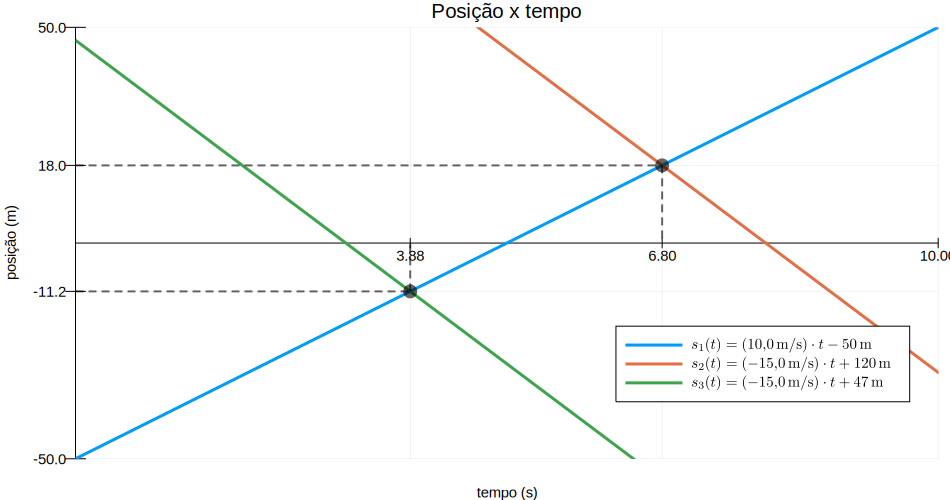

In [8]:
#calculando o instante em que s1(t) = s2(t)
t12 = (s2[1]-s1[1])/(v1 - v2)
#calculando a posição em que s1(t) = s2(t)
s12 = s(t12,v1,s1[1])

strs12 = @sprintf("Os objetos 1 e 2 se cruzam no instante t = %3.2f s, e na posição s = %3.1f m.\n", t12, s12)
strs12 = replace(strs12, "." => ",", count = 2)

#calculando o instante em que s1(t) = s2(t)
t13 = (s3[1]-s1[1])/(v1 - v2)
#calculando a posição em que s1(t) = s2(t)
s13 = s(t13,v1,s1[1])

strs13 = @sprintf("Os objetos 1 e 3 se cruzam no instante t = %3.2f s, e na posição s = %3.1f m.", t13, s13)
strs13 = replace(strs13, "." => ",", count = 2)

#mostrando no gráfico os pontos onde s1 e s2, e s1 e s3 se cruzam.
plot(tempo, s1, lw = 3, xaxis = ("tempo (s)", (0,10), [0, t12, t13, 10], font(10)),
    yaxis = ("posição (m)", (-50,50), [-50, s13, s12, 50], font(10)), size = (950,500),
    framestyle = :origin, title = "Posição x tempo", label = eqstr, legend = :bottomright,
    legendfontsize = 10)
plot!(tempo,s2, title = "Posição x tempo", lw = 3, label = eqstr2)
plot!(tempo,s3, lw = 3, label = eqstr3)

scatter!([t12],[s12], marker = :circle, markersize = 8, label = :none, color = :black, alpha = 0.6)
plot!([t12,t12],[s12,0], lw = 2, alpha = 0.6, color = :black, ls = :dash, label = :none)
plot!([0,t12],[s12,s12], lw = 2, alpha = 0.6, color = :black, ls = :dash, label = :none)

scatter!([t13],[s13], marker = :circle, markersize = 8, label = :none, color = :black, alpha = 0.6)
plot!([t13,t13],[s13,0], lw = 2, alpha = 0.6, color = :black, ls = :dash, label = :none)
plot!([0,t13],[s13,s13], lw = 2, alpha = 0.6, color = :black, ls = :dash, label = :none)

#lens!([3, 7],[-20,30], inset=(1, bbox(0.1,0.7,0.3,0.3)), framestyle = :origin)

In [276]:
println(strs12)
println(strs13)

Os objetos 1 e 2 se cruzam no instante t = 6,80 s, e na posição s = 18,0 m.

Os objetos 1 e 3 se cruzam no instante t = 3,88 s, e na posição s = -11,2 m.
